In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from collections import Counter

Mengakses File dari Google Drive:

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Akses file dari Google Drive
file_path = '/content/drive/My Drive/strokedataset/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)
data.head()

,id;gender;age;hypertension;heart_disease;ever_married;work_type;Residence_type;avg_glucose_level;bmi;smoking_status;stroke
0,9046;Male;67;0;1;Yes;Private;Urban;228.69;36.6...
1,51676;Female;61;0;0;Yes;Self-employed;Rural;20...
2,31112;Male;80;0;1;Yes;Private;Rural;105.92;32....
3,60182;Female;49;0;0;Yes;Private;Urban;171.23;3...
4,1665;Female;79;1;0;Yes;Self-employed;Rural;174...


Mengubah Delimiter

In [ ]:
data = pd.read_csv(file_path, delimiter=';')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Memilih Kolom Tertentu

In [ ]:
data_selected = data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
                      'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]
print(data_selected.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Mengatasi Missing Value (NaN)

In [ ]:
data_selected['bmi'].fillna(data_selected['bmi'].mean(), inplace=True)
print(data_selected.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


<ipython-input-6-80ecdf1cd9b3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_selected['bmi'].fillna(data_selected['bmi'].mean(), inplace=True)
<ipython-input-6-80ecdf1cd9b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['bmi'].fillna(data_selected['bmi'].mean(), inplace=True)


Encoding Data

In [ ]:

# Melakukan label encoding untuk kolom 'ever_married' dan 'Residence_type'
label_encoder = LabelEncoder()
data_selected[['ever_married', 'Residence_type']] = data_selected[['ever_married', 'Residence_type']].apply(label_encoder.fit_transform)

# Melakukan one-hot encoding untuk kolom 'gender', 'work_type', dan 'smoking_status'
onehot_encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded_categorical = onehot_encoder.fit_transform(data[['gender', 'work_type', 'smoking_status']])
encoded_df = pd.DataFrame(encoded_categorical, columns=onehot_encoder.get_feature_names_out(['gender', 'work_type', 'smoking_status']))

# Menggabungkan data yang telah di-encode dengan data yang sudah dipilih
data_transformed = pd.concat([data_selected.drop(columns=['gender', 'work_type', 'smoking_status']), encoded_df], axis=1)

<ipython-input-7-7ee0cdd02da7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[['ever_married', 'Residence_type']] = data_selected[['ever_married', 'Residence_type']].apply(label_encoder.fit_transform)


In [ ]:
print("Data sebelum encoding:")
print(data_selected.head())

print("\nData setelah encoding:")
print(data_transformed.head())

Data sebelum encoding:
   gender   age  hypertension  heart_disease  ever_married      work_type  \
0    Male  67.0             0              1             1        Private   
1  Female  61.0             0              0             1  Self-employed   
2    Male  80.0             0              1             1        Private   
3  Female  49.0             0              0             1        Private   
4  Female  79.0             1              0             1  Self-employed   

   Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0               1             228.69  36.600000  formerly smoked       1  
1               0             202.21  28.893237     never smoked       1  
2               0             105.92  32.500000     never smoked       1  
3               1             171.23  34.400000           smokes       1  
4               0             174.12  24.000000     never smoked       1  

Data setelah encoding:
    age  hypertension  heart_disease  ev

Normalisasi Data

In [ ]:
scaler = MinMaxScaler()
data_transformed[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(data_transformed[['age', 'avg_glucose_level', 'bmi']])
print(data_transformed[['age', 'avg_glucose_level', 'bmi']].head())

        age  avg_glucose_level       bmi
0  0.816895           0.801265  0.301260
1  0.743652           0.679023  0.212981
2  0.975586           0.234512  0.254296
3  0.597168           0.536008  0.276060
4  0.963379           0.549349  0.156930


Menyiapkan fitur target

In [ ]:
# Siapkan fitur dan target variable
X = data_transformed.drop('stroke', axis=1)
y = data_transformed['stroke']

sebelum smote

Total data: 5110
Jumlah data sebelum SMOTE: 5110 sampel
Distribusi kelas sebelum SMOTE: Counter({0: 4861, 1: 249})


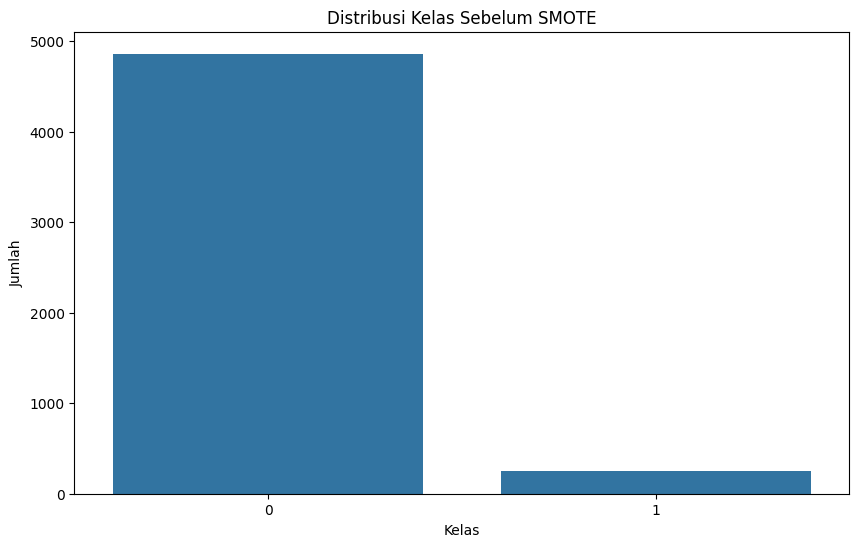

In [ ]:


# Menampilkan total data dan distribusi kelas sebelum SMOTE
print(f"Total data: {len(X)}")
print(f"Jumlah data sebelum SMOTE: {len(X)} sampel")
print(f"Distribusi kelas sebelum SMOTE: {Counter(y)}")

# Visualisasi distribusi kelas sebelum SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

Total data: 9722
Jumlah data sebelum SMOTE: 9722 sampel
Distribusi kelas sebelum SMOTE: Counter({1: 4861, 0: 4861})


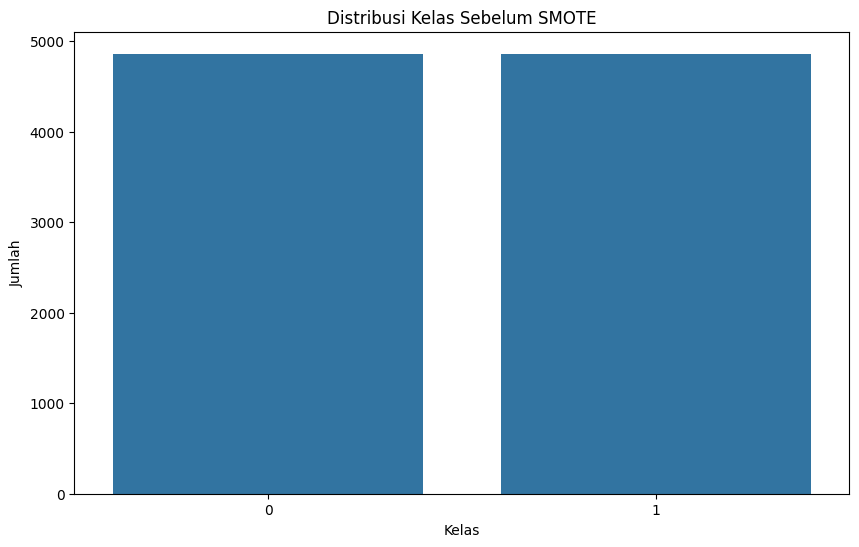

In [ ]:
# Mengatasi ketidakseimbangan kelas dengan SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


# Menampilkan total data dan distribusi kelas sebelum SMOTE
print(f"Total data: {len(X_resampled)}")
print(f"Jumlah data sebelum SMOTE: {len(X_resampled)} sampel")
print(f"Distribusi kelas sebelum SMOTE: {Counter(y_resampled)}")

# Visualisasi distribusi kelas sebelum SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_resampled)
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# Menghitung information gain (mutual information) untuk setiap fitur
info_gain = mutual_info_classif(X_resampled, y_resampled)

# Membuat DataFrame untuk menampilkan hasil information gain
info_gain_df = pd.DataFrame({
    'Feature': X.columns,
    'Information Gain': info_gain
})

# Menampilkan fitur dengan information gain tertinggi
print("Information Gain untuk setiap fitur:")
print(info_gain_df.sort_values(by='Information Gain', ascending=False))

# Menentukan ambang batas information gain untuk seleksi fitur (misalnya, ambil fitur dengan information gain > 0.1)
threshold = 0.1
selected_features = info_gain_df[info_gain_df['Information Gain'] > threshold]['Feature']

Information Gain untuk setiap fitur:
                           Feature  Information Gain
0                              age          0.548510
6                              bmi          0.457940
5                avg_glucose_level          0.059757
3                     ever_married          0.041711
14              work_type_children          0.039979
12               work_type_Private          0.020289
16  smoking_status_formerly smoked          0.019111
13         work_type_Self-employed          0.018939
10              work_type_Govt_job          0.011584
15          smoking_status_Unknown          0.011121
1                     hypertension          0.010204
17     smoking_status_never smoked          0.010165
7                    gender_Female          0.007728
8                      gender_Male          0.006761
9                     gender_Other          0.004240
11          work_type_Never_worked          0.000930
4                   Residence_type          0.000000
2        

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

thresholds = [0.1, 0.2, 0.3, 0.5]
best_threshold = None
best_score = 0

for threshold in thresholds:
    selected_features = info_gain_df[info_gain_df['Information Gain'] > threshold]['Feature']
    X_selected = X[selected_features]

    # Evaluasi menggunakan cross-validation
    model = RandomForestClassifier()
    score = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy').mean()

    print(f"Threshold: {threshold}, Accuracy: {score}")

    # Memilih threshold dengan skor tertinggi
    if score > best_score:
        best_score = score
        best_threshold = threshold

print(f"Threshold terbaik: {best_threshold} dengan akurasi: {best_score}")


Threshold: 0.1, Accuracy: 0.9311876500893923
Threshold: 0.2, Accuracy: 0.9318045108804892
Threshold: 0.3, Accuracy: 0.9333479323367927
Threshold: 0.5, Accuracy: 0.931187385614692
Threshold terbaik: 0.3 dengan akurasi: 0.9333479323367927


In [ ]:
# Membagi data menjadi training dan testing set
# X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)  # Original line causing the error

# Instead, use X_resampled with selected features:
X_selected_resampled = X_resampled[selected_features] # Select features from the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_selected_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Melatih model SVM dengan kernel RBF
# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
C_values = [100]
gamma_values = [1]

def train_and_evaluate_rbf_svm(C, gamma):
    model = SVC(C=C, kernel='rbf', gamma=gamma, random_state=42)
    model.fit(X, y)
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()  # Mengambil nilai dari confusion matrix

    # Precision, Recall, F1 Score Manual Calculation
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Print Evaluation Metrics
    print(f"Classification Report for C={C}, gamma={gamma}:\n", classification_report(y_test, y_pred))
    print(f"Accuracy Score for C={C}, gamma={gamma}: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Manual Precision for C={C}, gamma={gamma}: {precision:.4f}")
    print(f"Manual Recall for C={C}, gamma={gamma}: {recall:.4f}")
    print(f"Manual F1 Score for C={C}, gamma={gamma}: {f1:.4f}")

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for C={C}, gamma={gamma}')
    plt.show()

Classification Report for C=100, gamma=1:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       483
           1       0.91      0.36      0.51        28

    accuracy                           0.96       511
   macro avg       0.94      0.68      0.75       511
weighted avg       0.96      0.96      0.96       511

Accuracy Score for C=100, gamma=1: 0.9628
Manual Precision for C=100, gamma=1: 0.9091
Manual Recall for C=100, gamma=1: 0.3571
Manual F1 Score for C=100, gamma=1: 0.5128


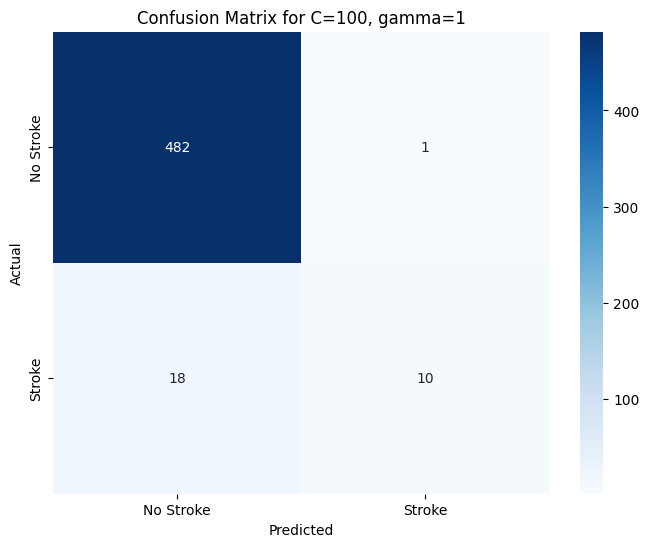

In [ ]:
for C in C_values:
    for gamma in gamma_values:
        train_and_evaluate_rbf_svm(C, gamma)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       483
           1       0.00      0.00      0.00        28

    accuracy                           0.95       511
   macro avg       0.47      0.50      0.49       511
weighted avg       0.89      0.95      0.92       511

Accuracy: 0.9452
Manual Precision: 0.0000
Manual Recall: 0.0000
Manual F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


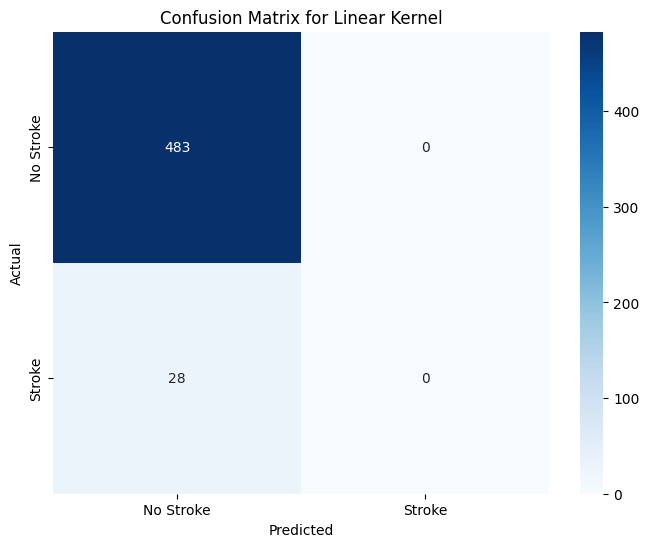

In [ ]:
# Kernel Linear
linear_model = SVC(kernel='linear', random_state=42)
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Confusion Matrix for Linear Kernel
cm_linear = confusion_matrix(y_test, y_pred_linear)
TN, FP, FN, TP = cm_linear.ravel()

# Manual Calculation of Precision, Recall, F1 Score for Linear Kernel
precision_linear = TP / (TP + FP) if (TP + FP) != 0 else 0
recall_linear = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_linear = 2 * (precision_linear * recall_linear) / (precision_linear + recall_linear) if (precision_linear + recall_linear) != 0 else 0

print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear))
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")
print(f"Manual Precision: {precision_linear:.4f}")
print(f"Manual Recall: {recall_linear:.4f}")
print(f"Manual F1 Score: {f1_linear:.4f}")

# Visualisasi Confusion Matrix for Linear Kernel
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Linear Kernel')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       975
           1       0.80      0.90      0.85       970

    accuracy                           0.84      1945
   macro avg       0.84      0.84      0.84      1945
weighted avg       0.84      0.84      0.84      1945

Accuracy: 0.8365
Manual Precision: 0.7991
Manual Recall: 0.8979
Manual F1 Score: 0.8456


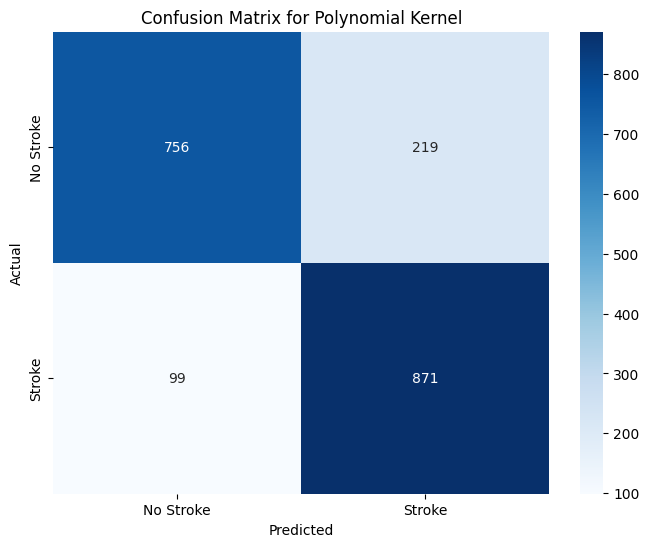

In [ ]:
# Kernel Polynomial
poly_model = SVC(kernel='poly', degree=3, random_state=42)
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# Confusion Matrix for Polynomial Kernel
cm_poly = confusion_matrix(y_test, y_pred_poly)
TN, FP, FN, TP = cm_poly.ravel()

# Manual Calculation of Precision, Recall, F1 Score for Polynomial Kernel
precision_poly = TP / (TP + FP) if (TP + FP) != 0 else 0
recall_poly = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_poly = 2 * (precision_poly * recall_poly) / (precision_poly + recall_poly) if (precision_poly + recall_poly) != 0 else 0

print("\nClassification Report:")
print(classification_report(y_test, y_pred_poly))
print(f"Accuracy: {accuracy_score(y_test, y_pred_poly):.4f}")
print(f"Manual Precision: {precision_poly:.4f}")
print(f"Manual Recall: {recall_poly:.4f}")
print(f"Manual F1 Score: {f1_poly:.4f}")

# Visualisasi Confusion Matrix for Polynomial Kernel
plt.figure(figsize=(8, 6))
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Polynomial Kernel')
plt.show()

In [ ]:
# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       472
           1       0.79      0.89      0.84       501

    accuracy                           0.83       973
   macro avg       0.83      0.82      0.82       973
weighted avg       0.83      0.83      0.83       973

Accuracy: 0.8263
Manual Precision: 0.7943
Manual Recall: 0.8942
Manual F1 Score: 0.8413


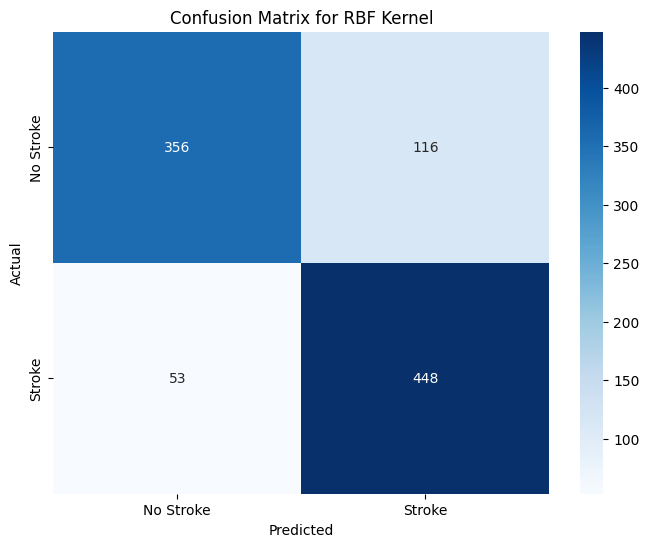

In [ ]:
# Kernel RBF
rbf_model = SVC(kernel='rbf', random_state=42)
rbf_model.fit(X_train, y_train)
y_pred_rbf = rbf_model.predict(X_test)

# Confusion Matrix for RBF Kernel
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
TN, FP, FN, TP = cm_rbf.ravel()

# Manual Calculation of Precision, Recall, F1 Score for RBF Kernel
precision_rbf = TP / (TP + FP) if (TP + FP) != 0 else 0
recall_rbf = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_rbf = 2 * (precision_rbf * recall_rbf) / (precision_rbf + recall_rbf) if (precision_rbf + recall_rbf) != 0 else 0

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.4f}")
print(f"Manual Precision: {precision_rbf:.4f}")
print(f"Manual Recall: {recall_rbf:.4f}")
print(f"Manual F1 Score: {f1_rbf:.4f}")

# Visualisasi Confusion Matrix for RBF Kernel
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for RBF Kernel')
plt.show()


In [ ]:
# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.9, random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       975
           1       0.56      0.54      0.55       970

    accuracy                           0.56      1945
   macro avg       0.56      0.56      0.56      1945
weighted avg       0.56      0.56      0.56      1945

Accuracy: 0.5594
Manual Precision: 0.5609
Manual Recall: 0.5361
Manual F1 Score: 0.5482


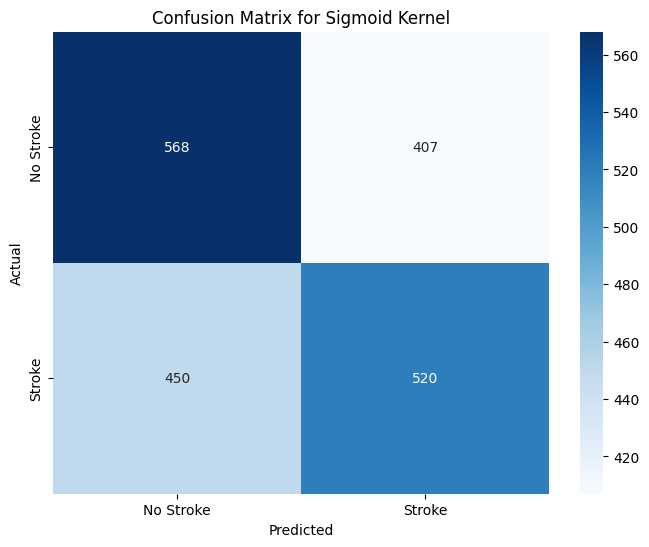

In [ ]:
# Kernel Sigmoid
sigmoid_model = SVC(kernel='sigmoid', random_state=42)
sigmoid_model.fit(X_train, y_train)
y_pred_sigmoid = sigmoid_model.predict(X_test)

# Confusion Matrix for Sigmoid Kernel
cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
TN, FP, FN, TP = cm_sigmoid.ravel()

# Manual Calculation of Precision, Recall, F1 Score for Sigmoid Kernel
precision_sigmoid = TP / (TP + FP) if (TP + FP) != 0 else 0
recall_sigmoid = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_sigmoid = 2 * (precision_sigmoid * recall_sigmoid) / (precision_sigmoid + recall_sigmoid) if (precision_sigmoid + recall_sigmoid) != 0 else 0

print("\nClassification Report:")
print(classification_report(y_test, y_pred_sigmoid))
print(f"Accuracy: {accuracy_score(y_test, y_pred_sigmoid):.4f}")
print(f"Manual Precision: {precision_sigmoid:.4f}")
print(f"Manual Recall: {recall_sigmoid:.4f}")
print(f"Manual F1 Score: {f1_sigmoid:.4f}")

# Visualisasi Confusion Matrix for Sigmoid Kernel
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sigmoid, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Sigmoid Kernel')
plt.show()

In [ ]:
# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Melatih model SVM dengan kernel linear
C_values = [0.1, 1, 10, 100]
def train_and_evaluate_linear_svm(C):
    model = SVC(kernel='linear', C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()  # Mengambil nilai dari confusion matrix

    # Precision, Recall, F1 Score Manual Calculation
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Print Evaluation Metrics
    print(f"Classification Report for C={C}:\n", classification_report(y_test, y_pred))
    print(f"Accuracy Score for C={C}: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Manual Precision for C={C}: {precision:.4f}")
    print(f"Manual Recall for C={C}: {recall:.4f}")
    print(f"Manual F1 Score for C={C}: {f1:.4f}")

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for C={C}')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for C=0.1:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       483
           1       0.00      0.00      0.00        28

    accuracy                           0.95       511
   macro avg       0.47      0.50      0.49       511
weighted avg       0.89      0.95      0.92       511

Accuracy Score for C=0.1: 0.9452
Manual Precision for C=0.1: 0.0000
Manual Recall for C=0.1: 0.0000
Manual F1 Score for C=0.1: 0.0000


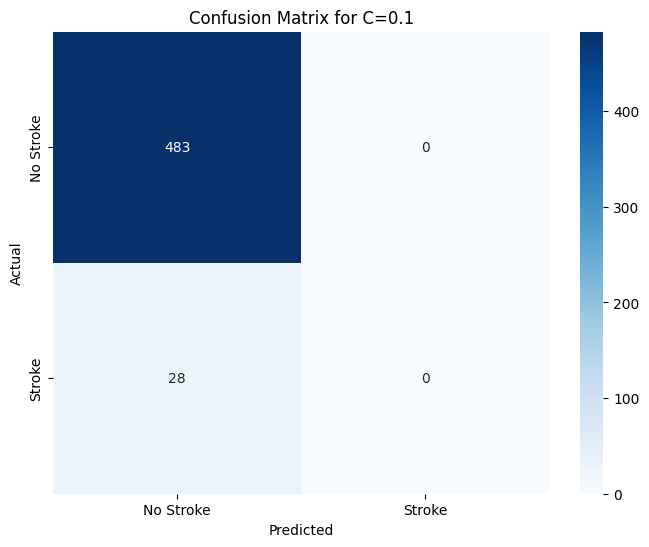

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for C=1:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       483
           1       0.00      0.00      0.00        28

    accuracy                           0.95       511
   macro avg       0.47      0.50      0.49       511
weighted avg       0.89      0.95      0.92       511

Accuracy Score for C=1: 0.9452
Manual Precision for C=1: 0.0000
Manual Recall for C=1: 0.0000
Manual F1 Score for C=1: 0.0000


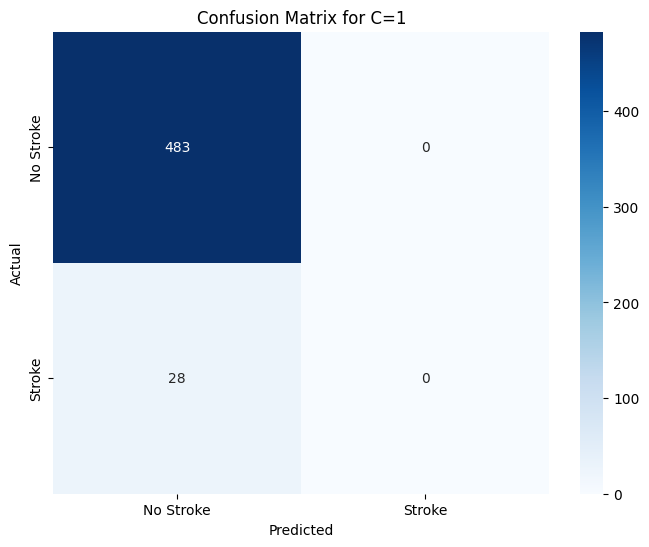

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for C=10:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       483
           1       0.00      0.00      0.00        28

    accuracy                           0.95       511
   macro avg       0.47      0.50      0.49       511
weighted avg       0.89      0.95      0.92       511

Accuracy Score for C=10: 0.9452
Manual Precision for C=10: 0.0000
Manual Recall for C=10: 0.0000
Manual F1 Score for C=10: 0.0000


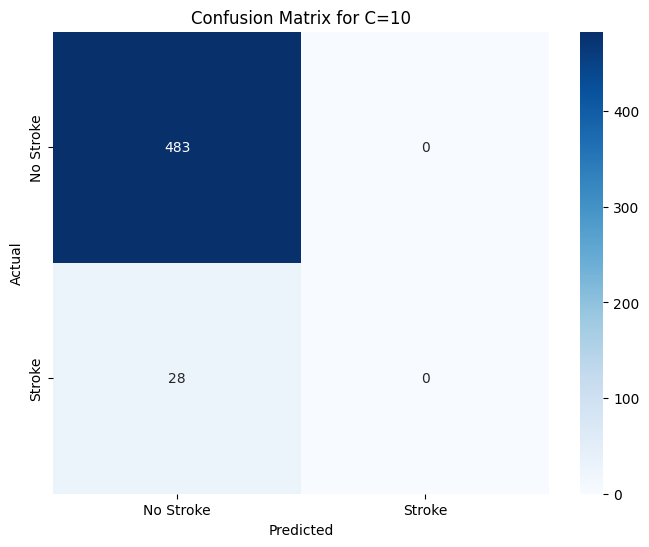

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for C=100:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       483
           1       0.00      0.00      0.00        28

    accuracy                           0.95       511
   macro avg       0.47      0.50      0.49       511
weighted avg       0.89      0.95      0.92       511

Accuracy Score for C=100: 0.9452
Manual Precision for C=100: 0.0000
Manual Recall for C=100: 0.0000
Manual F1 Score for C=100: 0.0000


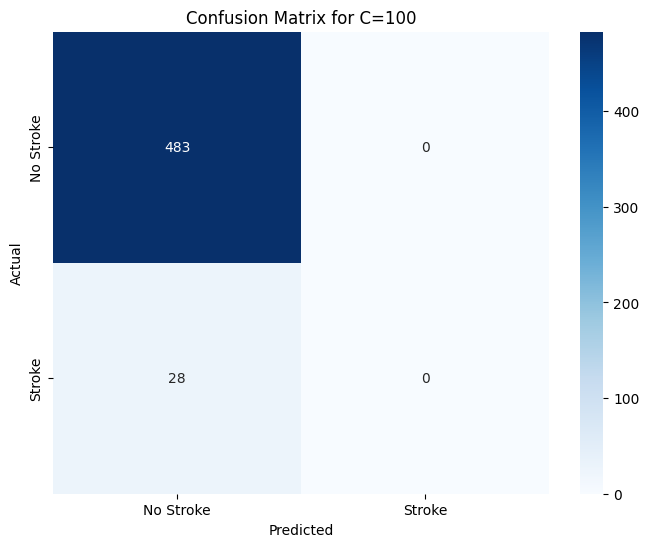

In [ ]:
for C in C_values:
    train_and_evaluate_linear_svm(C)

In [ ]:
# Melatih model SVM dengan kernel RBF
gamma_values = [0.01, 0.1, 1, 'scale']
def train_and_evaluate_rbf_svm(C, gamma):
    model = SVC(C=C, kernel='rbf', gamma=gamma, random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()  # Mengambil nilai dari confusion matrix

    # Precision, Recall, F1 Score Manual Calculation
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Print Evaluation Metrics
    print(f"Classification Report for C={C}, gamma={gamma}:\n", classification_report(y_test, y_pred))
    print(f"Accuracy Score for C={C}, gamma={gamma}: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Manual Precision for C={C}, gamma={gamma}: {precision:.4f}")
    print(f"Manual Recall for C={C}, gamma={gamma}: {recall:.4f}")
    print(f"Manual F1 Score for C={C}, gamma={gamma}: {f1:.4f}")

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for C={C}, gamma={gamma}')
    plt.show()


Classification Report for C=0.1, gamma=0.01:
               precision    recall  f1-score   support

           0       0.89      0.50      0.64       975
           1       0.65      0.94      0.77       970

    accuracy                           0.72      1945
   macro avg       0.77      0.72      0.70      1945
weighted avg       0.77      0.72      0.70      1945

Accuracy Score for C=0.1, gamma=0.01: 0.7172
Manual Precision for C=0.1, gamma=0.01: 0.6506
Manual Recall for C=0.1, gamma=0.01: 0.9351
Manual F1 Score for C=0.1, gamma=0.01: 0.7673


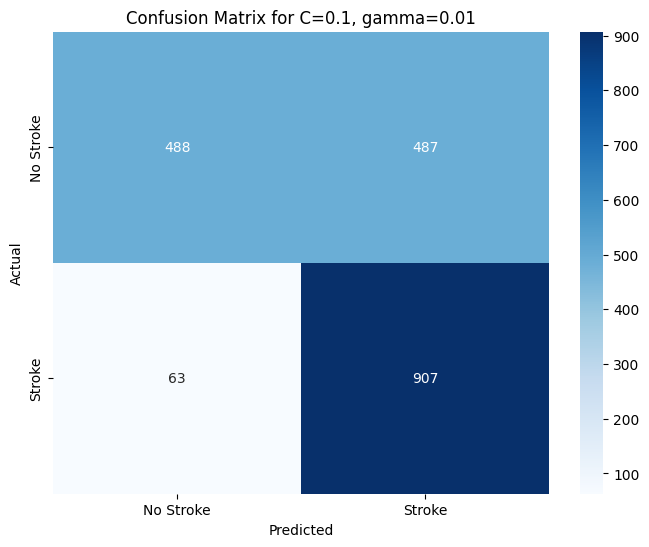

Classification Report for C=0.1, gamma=0.1:
               precision    recall  f1-score   support

           0       0.87      0.68      0.76       975
           1       0.74      0.90      0.81       970

    accuracy                           0.79      1945
   macro avg       0.80      0.79      0.79      1945
weighted avg       0.80      0.79      0.79      1945

Accuracy Score for C=0.1, gamma=0.1: 0.7877
Manual Precision for C=0.1, gamma=0.1: 0.7350
Manual Recall for C=0.1, gamma=0.1: 0.8979
Manual F1 Score for C=0.1, gamma=0.1: 0.8084


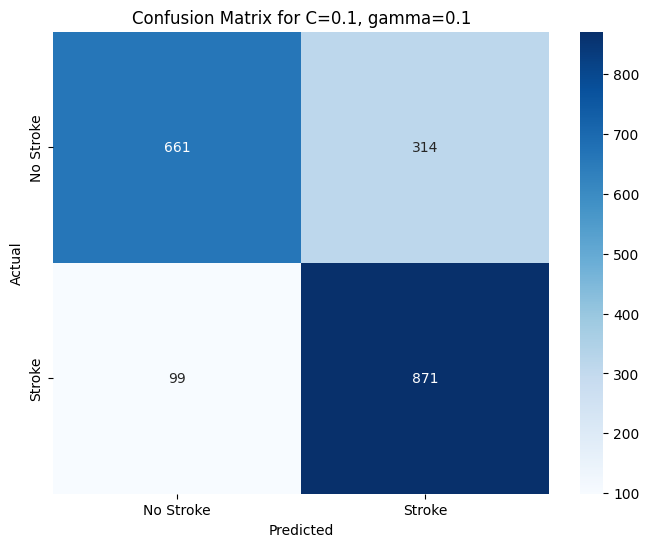

Classification Report for C=0.1, gamma=1:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80       975
           1       0.77      0.91      0.84       970

    accuracy                           0.82      1945
   macro avg       0.83      0.82      0.82      1945
weighted avg       0.83      0.82      0.82      1945

Accuracy Score for C=0.1, gamma=1: 0.8221
Manual Precision for C=0.1, gamma=1: 0.7718
Manual Recall for C=0.1, gamma=1: 0.9134
Manual F1 Score for C=0.1, gamma=1: 0.8366


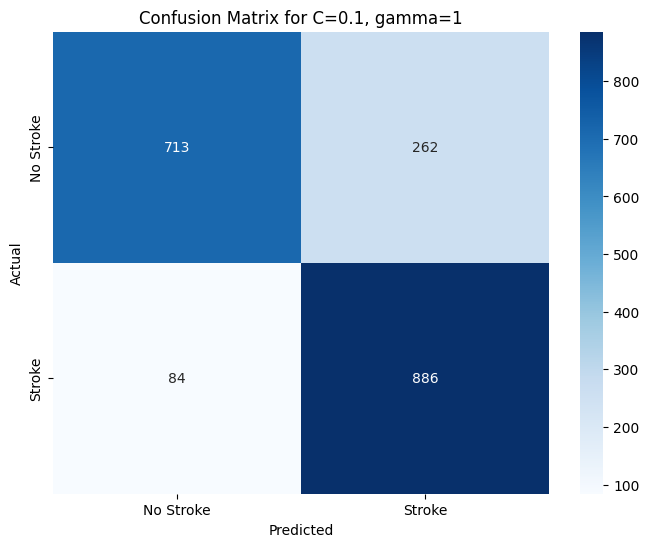

Classification Report for C=0.1, gamma=scale:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78       975
           1       0.75      0.91      0.82       970

    accuracy                           0.80      1945
   macro avg       0.82      0.80      0.80      1945
weighted avg       0.82      0.80      0.80      1945

Accuracy Score for C=0.1, gamma=scale: 0.8026
Manual Precision for C=0.1, gamma=scale: 0.7491
Manual Recall for C=0.1, gamma=scale: 0.9082
Manual F1 Score for C=0.1, gamma=scale: 0.8211


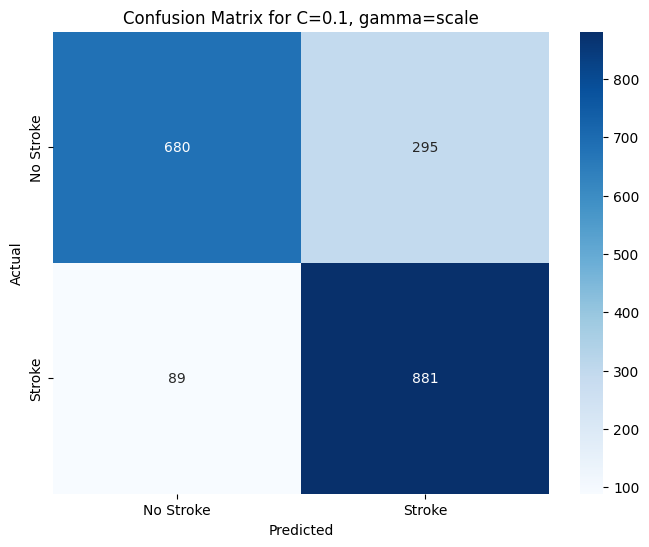

Classification Report for C=1, gamma=0.01:
               precision    recall  f1-score   support

           0       0.86      0.69      0.76       975
           1       0.74      0.89      0.81       970

    accuracy                           0.79      1945
   macro avg       0.80      0.79      0.79      1945
weighted avg       0.80      0.79      0.79      1945

Accuracy Score for C=1, gamma=0.01: 0.7877
Manual Precision for C=1, gamma=0.01: 0.7386
Manual Recall for C=1, gamma=0.01: 0.8887
Manual F1 Score for C=1, gamma=0.01: 0.8067


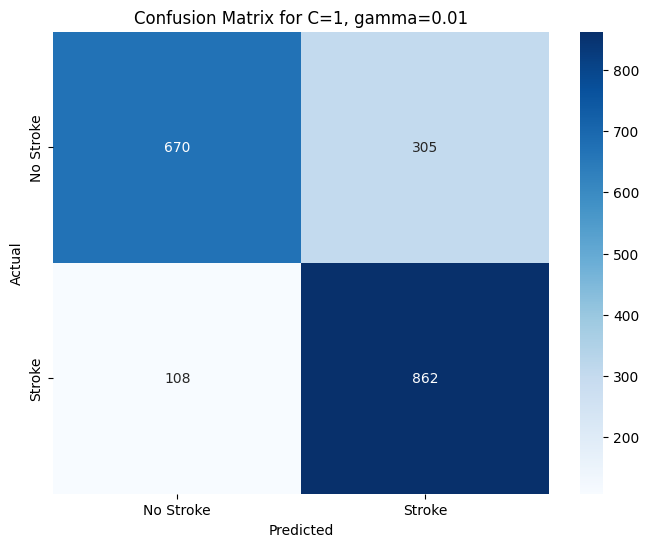

Classification Report for C=1, gamma=0.1:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81       975
           1       0.78      0.90      0.83       970

    accuracy                           0.82      1945
   macro avg       0.83      0.82      0.82      1945
weighted avg       0.83      0.82      0.82      1945

Accuracy Score for C=1, gamma=0.1: 0.8226
Manual Precision for C=1, gamma=0.1: 0.7793
Manual Recall for C=1, gamma=0.1: 0.8990
Manual F1 Score for C=1, gamma=0.1: 0.8348


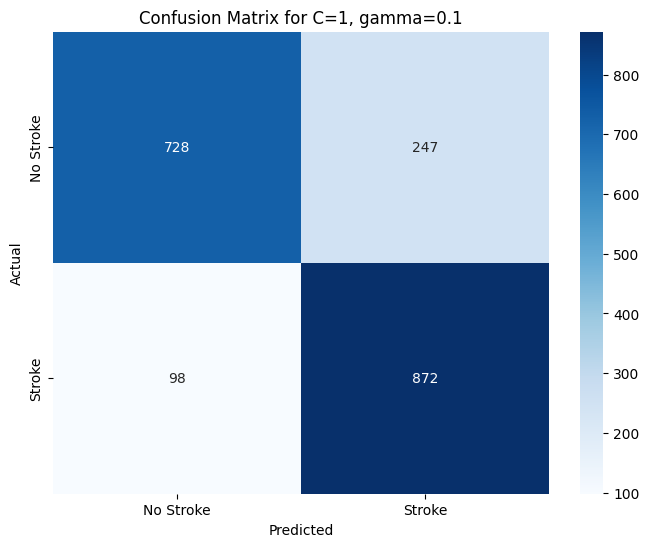

Classification Report for C=1, gamma=1:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85       975
           1       0.82      0.93      0.87       970

    accuracy                           0.86      1945
   macro avg       0.87      0.86      0.86      1945
weighted avg       0.87      0.86      0.86      1945

Accuracy Score for C=1, gamma=1: 0.8586
Manual Precision for C=1, gamma=1: 0.8150
Manual Recall for C=1, gamma=1: 0.9268
Manual F1 Score for C=1, gamma=1: 0.8673


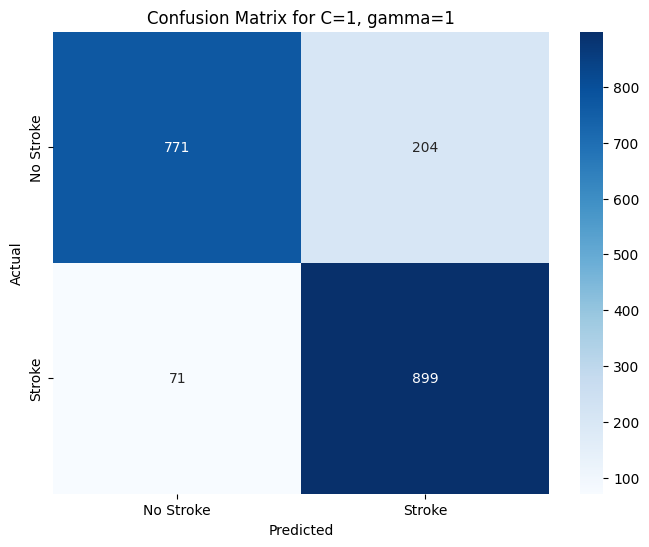

Classification Report for C=1, gamma=scale:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83       975
           1       0.80      0.92      0.85       970

    accuracy                           0.84      1945
   macro avg       0.85      0.84      0.84      1945
weighted avg       0.85      0.84      0.84      1945

Accuracy Score for C=1, gamma=scale: 0.8437
Manual Precision for C=1, gamma=scale: 0.7995
Manual Recall for C=1, gamma=scale: 0.9165
Manual F1 Score for C=1, gamma=scale: 0.8540


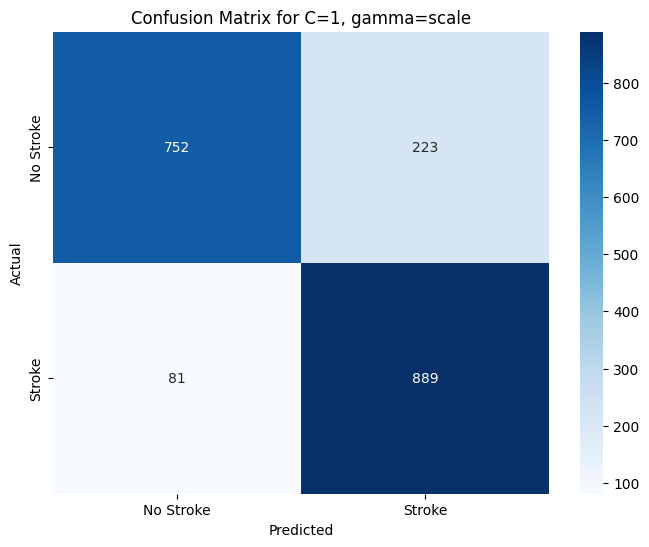

Classification Report for C=10, gamma=0.01:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79       975
           1       0.76      0.88      0.81       970

    accuracy                           0.80      1945
   macro avg       0.81      0.80      0.80      1945
weighted avg       0.81      0.80      0.80      1945

Accuracy Score for C=10, gamma=0.01: 0.8015
Manual Precision for C=10, gamma=0.01: 0.7616
Manual Recall for C=10, gamma=0.01: 0.8763
Manual F1 Score for C=10, gamma=0.01: 0.8150


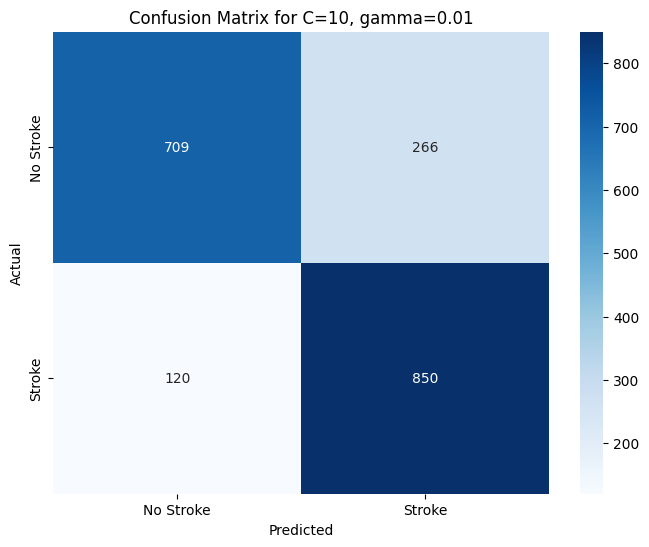

Classification Report for C=10, gamma=0.1:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83       975
           1       0.80      0.91      0.85       970

    accuracy                           0.84      1945
   macro avg       0.84      0.84      0.84      1945
weighted avg       0.84      0.84      0.84      1945

Accuracy Score for C=10, gamma=0.1: 0.8375
Manual Precision for C=10, gamma=0.1: 0.7957
Manual Recall for C=10, gamma=0.1: 0.9072
Manual F1 Score for C=10, gamma=0.1: 0.8478


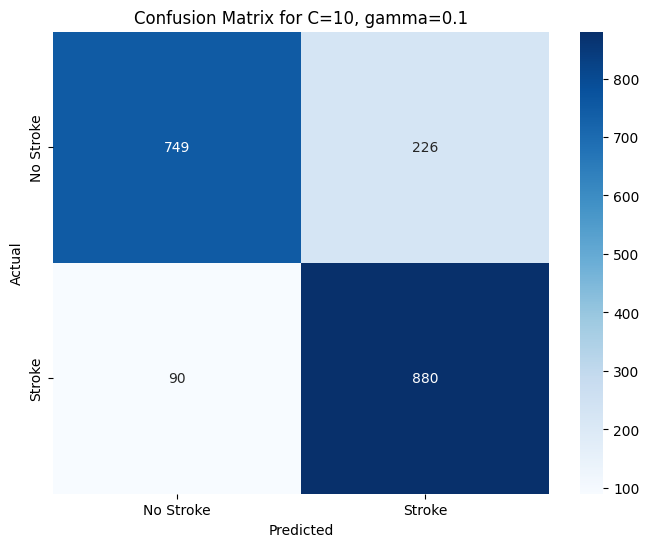

Classification Report for C=10, gamma=1:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89       975
           1       0.85      0.95      0.90       970

    accuracy                           0.89      1945
   macro avg       0.90      0.89      0.89      1945
weighted avg       0.90      0.89      0.89      1945

Accuracy Score for C=10, gamma=1: 0.8936
Manual Precision for C=10, gamma=1: 0.8536
Manual Recall for C=10, gamma=1: 0.9495
Manual F1 Score for C=10, gamma=1: 0.8990


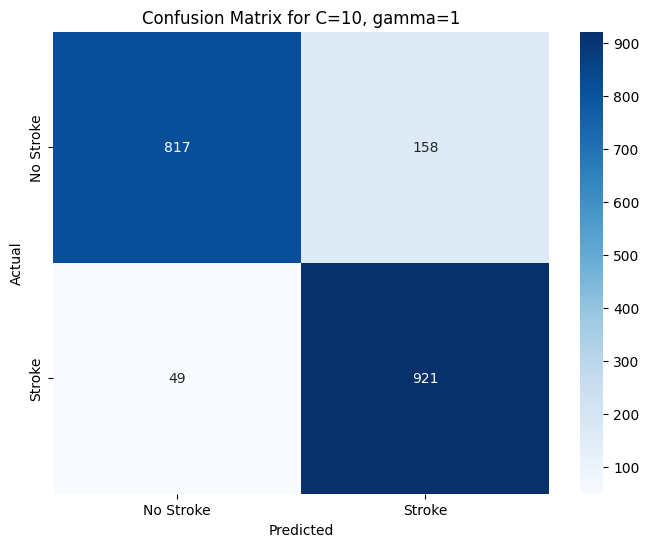

Classification Report for C=10, gamma=scale:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85       975
           1       0.82      0.93      0.87       970

    accuracy                           0.86      1945
   macro avg       0.87      0.86      0.86      1945
weighted avg       0.87      0.86      0.86      1945

Accuracy Score for C=10, gamma=scale: 0.8607
Manual Precision for C=10, gamma=scale: 0.8180
Manual Recall for C=10, gamma=scale: 0.9268
Manual F1 Score for C=10, gamma=scale: 0.8690


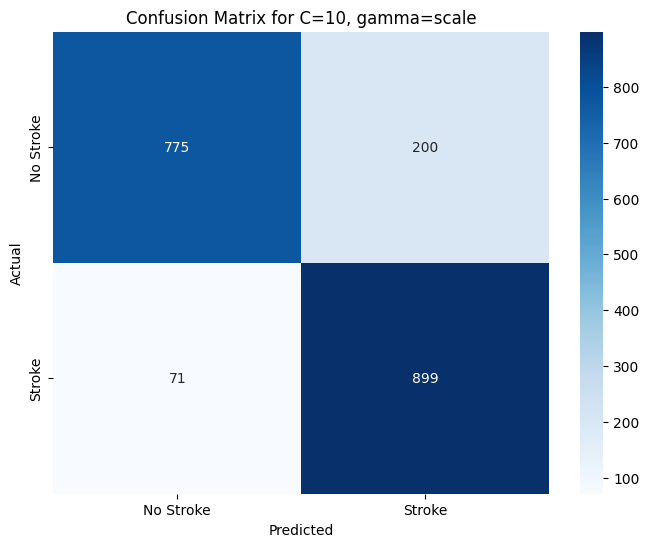

Classification Report for C=100, gamma=0.01:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80       975
           1       0.78      0.89      0.83       970

    accuracy                           0.82      1945
   macro avg       0.82      0.82      0.82      1945
weighted avg       0.82      0.82      0.82      1945

Accuracy Score for C=100, gamma=0.01: 0.8159
Manual Precision for C=100, gamma=0.01: 0.7757
Manual Recall for C=100, gamma=0.01: 0.8876
Manual F1 Score for C=100, gamma=0.01: 0.8279


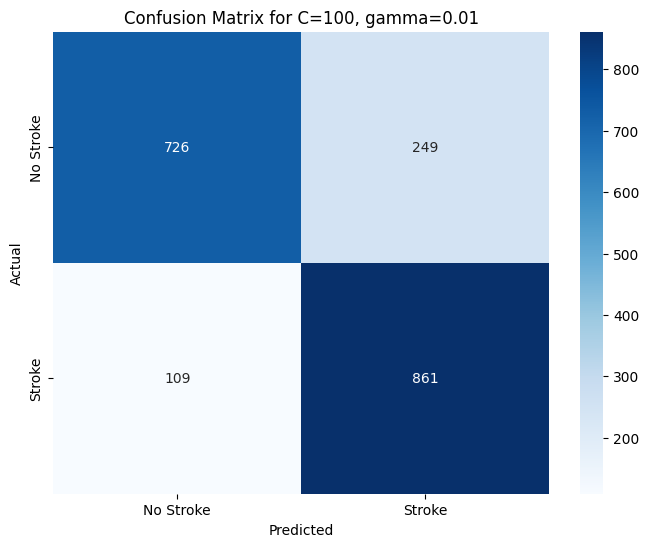

Classification Report for C=100, gamma=0.1:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85       975
           1       0.81      0.93      0.87       970

    accuracy                           0.86      1945
   macro avg       0.86      0.86      0.86      1945
weighted avg       0.87      0.86      0.86      1945

Accuracy Score for C=100, gamma=0.1: 0.8581
Manual Precision for C=100, gamma=0.1: 0.8143
Manual Recall for C=100, gamma=0.1: 0.9268
Manual F1 Score for C=100, gamma=0.1: 0.8669


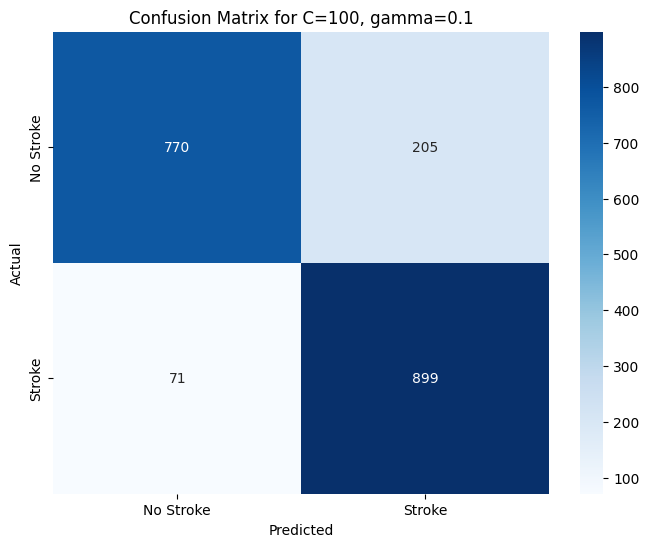

Classification Report for C=100, gamma=1:
               precision    recall  f1-score   support

           0       0.96      0.87      0.92       975
           1       0.88      0.96      0.92       970

    accuracy                           0.92      1945
   macro avg       0.92      0.92      0.92      1945
weighted avg       0.92      0.92      0.92      1945

Accuracy Score for C=100, gamma=1: 0.9193
Manual Precision for C=100, gamma=1: 0.8839
Manual Recall for C=100, gamma=1: 0.9649
Manual F1 Score for C=100, gamma=1: 0.9226


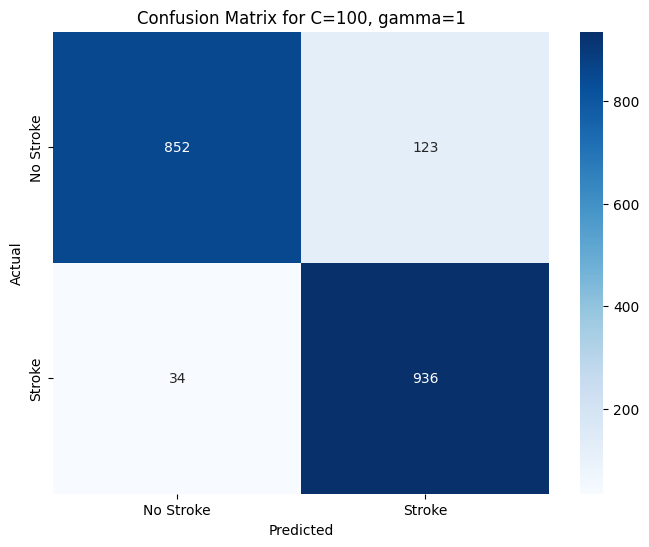

Classification Report for C=100, gamma=scale:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89       975
           1       0.85      0.96      0.90       970

    accuracy                           0.89      1945
   macro avg       0.90      0.89      0.89      1945
weighted avg       0.90      0.89      0.89      1945

Accuracy Score for C=100, gamma=scale: 0.8931
Manual Precision for C=100, gamma=scale: 0.8470
Manual Recall for C=100, gamma=scale: 0.9588
Manual F1 Score for C=100, gamma=scale: 0.8994


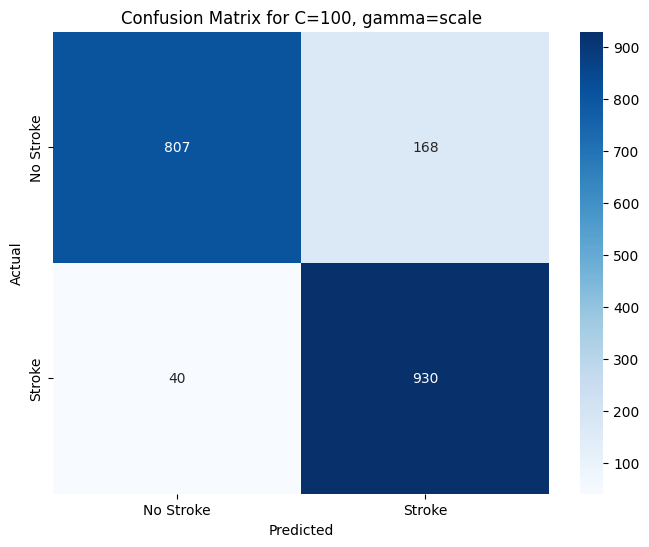

In [ ]:
for C in C_values:
    for gamma in gamma_values:
        train_and_evaluate_rbf_svm(C, gamma)

In [ ]:
# Melatih model SVM dengan kernel polinomial
degree_values = [1, 2, 3]
Y_values = [0, 1]
def train_and_evaluate_poly_svm(C, degree, coef0):
    model = SVC(C=C, kernel='poly', degree=degree, coef0=coef0, random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()  # Mengambil nilai dari confusion matrix

    # Precision, Recall, F1 Score Manual Calculation
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Print Evaluation Metrics
    print(f"Classification Report for C={C}, degree={degree}, coef0={coef0}:\n", classification_report(y_test, y_pred))
    print(f"Accuracy Score for C={C}, degree={degree}, coef0={coef0}: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Manual Precision for C={C}, degree={degree}, coef0={coef0}: {precision:.4f}")
    print(f"Manual Recall for C={C}, degree={degree}, coef0={coef0}: {recall:.4f}")
    print(f"Manual F1 Score for C={C}, degree={degree}, coef0={coef0}: {f1:.4f}")

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for C={C}, degree={degree}, coef0={coef0}')
    plt.show()


In [ ]:
for C in C_values:
    for degree in degree_values:
        for coef0 in Y_values:
            train_and_evaluate_poly_svm(C, degree, coef0)

In [ ]:
# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

In [ ]:
# Melatih model SVM dengan kernel linear
C_values = [0.1, 1, 10, 100]
def train_and_evaluate_linear_svm(C):
    model = SVC(kernel='linear', C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()  # Mengambil nilai dari confusion matrix

    # Precision, Recall, F1 Score Manual Calculation
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Print Evaluation Metrics
    print(f"Classification Report for C={C}:\n", classification_report(y_test, y_pred))
    print(f"Accuracy Score for C={C}: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Manual Precision for C={C}: {precision:.4f}")
    print(f"Manual Recall for C={C}: {recall:.4f}")
    print(f"Manual F1 Score for C={C}: {f1:.4f}")

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for C={C}')
    plt.show()

In [ ]:
for C in C_values:
    train_and_evaluate_linear_svm(C)

In [ ]:
# Melatih model SVM dengan kernel RBF
gamma_values = [0.01, 0.1, 1, 'scale']
def train_and_evaluate_rbf_svm(C, gamma):
    model = SVC(C=C, kernel='rbf', gamma=gamma, random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()  # Mengambil nilai dari confusion matrix

    # Precision, Recall, F1 Score Manual Calculation
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Print Evaluation Metrics
    print(f"Classification Report for C={C}, gamma={gamma}:\n", classification_report(y_test, y_pred))
    print(f"Accuracy Score for C={C}, gamma={gamma}: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Manual Precision for C={C}, gamma={gamma}: {precision:.4f}")
    print(f"Manual Recall for C={C}, gamma={gamma}: {recall:.4f}")
    print(f"Manual F1 Score for C={C}, gamma={gamma}: {f1:.4f}")

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for C={C}, gamma={gamma}')
    plt.show()


In [ ]:
for C in C_values:
    for gamma in gamma_values:
        train_and_evaluate_rbf_svm(C, gamma)

In [ ]:
# Melatih model SVM dengan kernel polinomial
degree_values = [1, 2, 3]
Y_values = [0, 1]
def train_and_evaluate_poly_svm(C, degree, coef0):
    model = SVC(C=C, kernel='poly', degree=degree, coef0=coef0, random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()  # Mengambil nilai dari confusion matrix

    # Precision, Recall, F1 Score Manual Calculation
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Print Evaluation Metrics
    print(f"Classification Report for C={C}, degree={degree}, coef0={coef0}:\n", classification_report(y_test, y_pred))
    print(f"Accuracy Score for C={C}, degree={degree}, coef0={coef0}: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Manual Precision for C={C}, degree={degree}, coef0={coef0}: {precision:.4f}")
    print(f"Manual Recall for C={C}, degree={degree}, coef0={coef0}: {recall:.4f}")
    print(f"Manual F1 Score for C={C}, degree={degree}, coef0={coef0}: {f1:.4f}")

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for C={C}, degree={degree}, coef0={coef0}')
    plt.show()


In [ ]:
for C in C_values:
    for degree in degree_values:
        for coef0 in Y_values:
            train_and_evaluate_poly_svm(C, degree, coef0)